In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest

In [54]:
df_raw = pd.read_csv("/Users/mikemurphy/Desktop/Mcgill_Winter_2023/W2_Adv_Info_systems_prod/Group Project/media prediction and its cost.csv")

In [55]:
df_raw

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


In [56]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_raw.columns:
    uni_len = len(set(df_raw[c]))
    dtype = df_raw[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: float64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: float64 	 Column name: total_children
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: float64 	 Column name: num_children_at_home
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx).1


In [57]:
isolation_forest = IsolationForest(contamination = 0.05, max_samples = 100, random_state = 0)

# DataFrame to store the outlier predictions
outlier_preds = pd.DataFrame()

# Iterate all numerical columns
for col in num_cols:
    # Fit the Isolation Forest to the current column
    isolation_forest.fit(df_raw[[col]])
    
    # Get the outlier predictions for the current column
    outlier_pred = isolation_forest.predict(df_raw[[col]])
    
    # Add the outlier predictions as a new column in the outlier_preds DataFrame
    outlier_preds[col] = outlier_pred

outlier_preds

/Users/mikemurphy/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/mikemurphy/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/mikemurphy/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/mikemurphy/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/mikemurphy/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/mik

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1
60424,1,-1,-1,1,1,1,1,1,1,1,-1,1,1,1,1,1
60425,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
60426,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1


In [58]:
df_woOut = df_raw.iloc[outlier_pred == 1]
df_woOut

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
6,Breakfast Foods,Frozen Foods,Food,5.44,2.5568,4.0,Cash Register Lottery,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


Text(0.5, 1.0, 'Correlation Matrix')

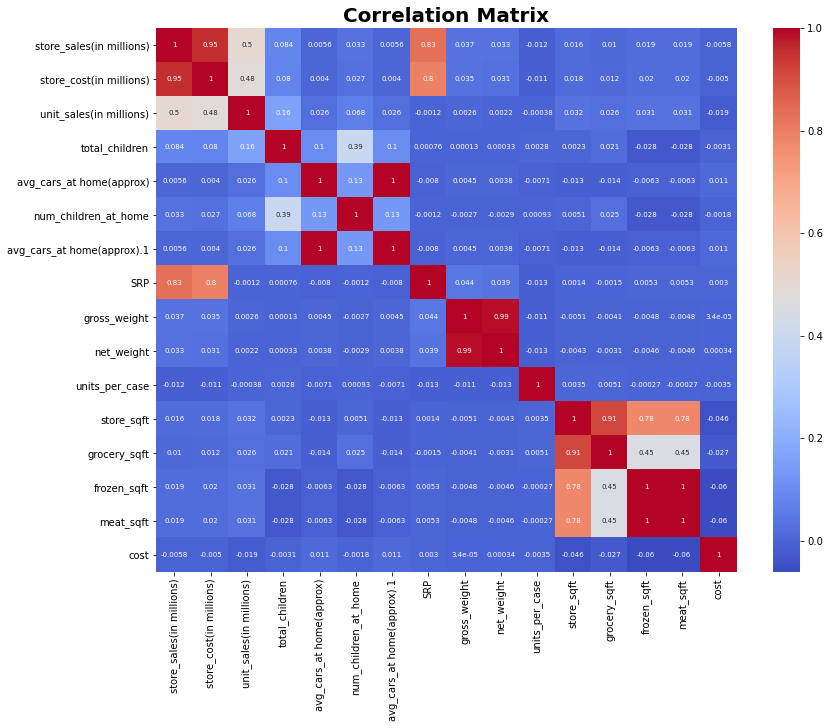

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13, 10))

sns.heatmap(df_woOut[num_cols].corr(), annot = True, cmap = 'coolwarm', annot_kws = {'size' : 7})
plt.title("Correlation Matrix", fontsize = 20, fontweight = 'bold')

# Feature Engineering

According to the correlation matrix, we will do feature engineering to preserve as much data as possible at this stage while not facing multicollinearity.

In [60]:
df_woOut['frozen_to_meat_ratio'] = df_woOut['frozen_sqft'] / df_woOut['meat_sqft']
df_woOut['meat_to_total_ratio'] = df_woOut['meat_sqft'] / df_woOut['store_sqft']

<ipython-input-60-79e925832d04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woOut['frozen_to_meat_ratio'] = df_woOut['frozen_sqft'] / df_woOut['meat_sqft']
<ipython-input-60-79e925832d04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woOut['meat_to_total_ratio'] = df_woOut['meat_sqft'] / df_woOut['store_sqft']


In [61]:
df_woOut = df_woOut.drop(['frozen_sqft', 'meat_sqft', 'grocery_sqft', 'store_sqft',
                          'gross_weight', 'avg_cars_at home(approx).1', 'grocery_sqft'], axis = 1)

In [62]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_woOut.columns:
    uni_len = len(set(df_woOut[c]))
    dtype = df_woOut[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: float64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: float64 	 Column name: total_children
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: float64 	 Column name: num_children_at_home


Text(0.5, 1.0, 'Correlation Matrix')

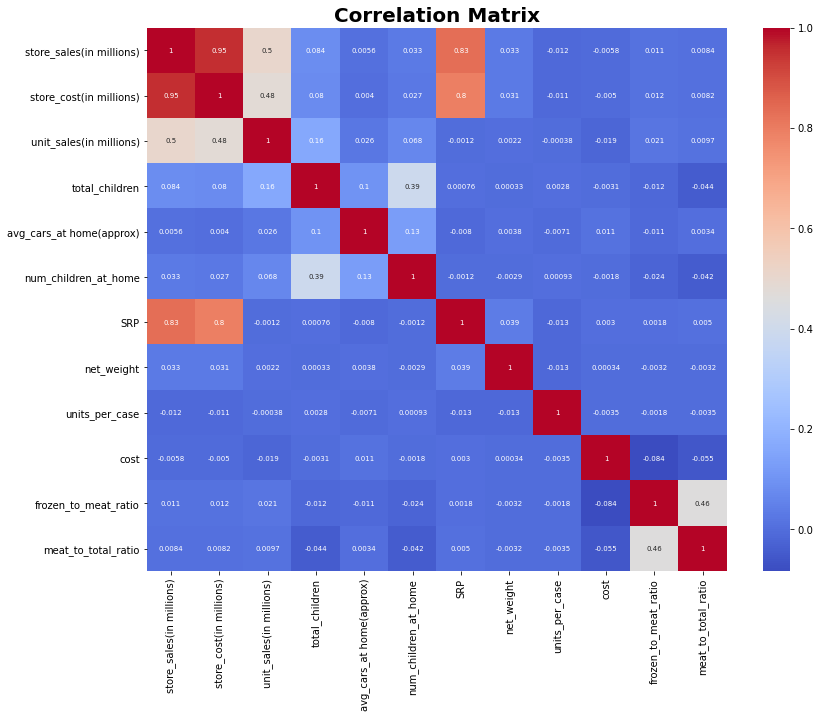

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13, 10))

sns.heatmap(df_woOut[num_cols].corr(), annot = True, cmap = 'coolwarm', annot_kws = {'size' : 7})
plt.title("Correlation Matrix", fontsize = 20, fontweight = 'bold')

In [64]:
cols = [c for c in num_cols if c != 'store_sales(in millions)'] # exclude target

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
MinMax_scaled = min_max_scaler.fit_transform(df_woOut[cols])

MinMax_scaled

array([[-0.46461995,  0.2       , -0.6       , ...,  0.56071202,
         0.11000332,  0.26845737],
       [-0.49155626, -0.2       , -1.        , ..., -0.85399449,
         0.11000332,  0.26845737],
       [-0.74937522, -0.6       ,  0.6       , ..., -0.33905488,
         0.11000332,  0.26845737],
       ...,
       [-0.50310039, -0.6       , -0.6       , ..., -0.69188387,
        -0.4091355 ,  0.19257961],
       [-0.49732833, -0.2       , -0.2       , ...,  0.69336724,
         0.64177236, -0.98319777],
       [-0.14908034,  0.2       ,  0.2       , ..., -0.26276754,
         0.64177236, -0.98319777]])

In [65]:
cols = [c for c in num_cols if c != 'store_sales(in millions)'] # exclude target

std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(df_woOut[cols])
std_scaled

array([[ 0.07233608,  1.09602519, -1.03128914, ...,  0.94631895,
        -0.01604716,  0.18363349],
       [-0.01624973, -0.11019699, -1.70201487, ..., -1.37915226,
        -0.01604716,  0.18363349],
       [-0.86414255, -1.31641916,  0.98088805, ..., -0.53270304,
        -0.01604716,  0.18363349],
       ...,
       [-0.05421508, -1.31641916, -1.03128914, ..., -1.11267751,
        -0.97003583,  0.05803928],
       [-0.03523241, -0.11019699, -0.36056341, ...,  1.16437541,
         0.96115125, -1.88812817],
       [ 1.11005565,  1.09602519,  0.31016232, ..., -0.40730315,
         0.96115125, -1.88812817]])

In [66]:
#df = pd.DataFrame(std_scaled, columns = [c for c in num_cols if c != 'cost'])
df = pd.DataFrame(MinMax_scaled, columns = [c for c in num_cols if c != 'store_sales(in millions)'])

# Concatenate standardized/normalized numerical columns with the others
df = pd.concat([df.reset_index(drop=True), 
                df_woOut[cate_cols + pre_dum_cols].reset_index(drop=True)], axis=1)

### Dropping irrelevant attributes

We will drop irrelevant attributes or attributes that have too many variables to avoid over-complicating our model.

In [67]:
df = df.drop(['food_category', 'food_department', 'brand_name', 'store_city', 'promotion_name', 'SRP'], axis = 1)

### Dummifying categorical variables



Since 'media_type' will be our treatment for the causal inference, we encode it differently not to add too many features/predictors to our model.

In [70]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit_transform(df['media_type'].tolist())

# to decode values 
# label_encoder.inverse_transform([1, 1, 0])

df['media_type_labeled'] = label_encoder.fit_transform(df['media_type'].tolist())
df

,store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,net_weight,units_per_case,cost,frozen_to_meat_ratio,meat_to_total_ratio,...,store_state,media_type,recyclable_package,low_fat,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type_labeled
0,-0.464620,0.2,-0.6,-0.5,-0.6,0.650704,-0.085714,0.560712,0.110003,0.268457,...,OR,"Daily Paper, Radio",1.0,0.0,1.0,1.0,1.0,1.0,1.0,3
1,-0.491556,-0.2,-1.0,1.0,-1.0,0.650704,-0.085714,-0.853994,0.110003,0.268457,...,OR,"Daily Paper, Radio",1.0,0.0,1.0,1.0,1.0,1.0,1.0,3
2,-0.749375,-0.6,0.6,-0.5,-1.0,0.650704,-0.085714,-0.339055,0.110003,0.268457,...,OR,"Daily Paper, Radio",1.0,0.0,1.0,1.0,1.0,1.0,1.0,3
3,-0.787856,-0.6,-0.2,0.0,-0.2,0.650704,-0.085714,-0.092816,0.110003,0.268457,...,OR,In-Store Coupon,1.0,0.0,1.0,1.0,1.0,1.0,1.0,5
4,-0.499420,0.2,0.6,0.0,-1.0,-0.767887,0.600000,-0.092816,0.110003,0.268457,...,OR,In-Store Coupon,0.0,1.0,1.0,1.0,1.0,1.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57418,-0.757071,-1.0,-0.6,-0.5,-0.6,0.752113,0.428571,-0.104047,-0.409135,0.192580,...,CA,In-Store Coupon,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5
57419,-0.930401,-1.0,-0.2,0.0,-1.0,0.380282,1.000000,-0.651409,-0.409135,0.192580,...,CA,Sunday Paper,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9
57420,-0.503100,-0.6,-0.6,0.5,-1.0,0.752113,0.428571,-0.691884,-0.409135,0.192580,...,CA,"Sunday Paper, Radio, TV",1.0,0.0,1.0,0.0,0.0,0.0,0.0,11
57421,-0.497328,-0.2,-0.2,1.0,-1.0,0.752113,0.428571,0.693367,0.641772,-0.983198,...,BC,Sunday Paper,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9


In [71]:
# Dummify categorical variables except for 'media type'
df = pd.get_dummies(df[[c for c in df.columns if c != 'media_type']], drop_first = True)

In [72]:
df

,store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,net_weight,units_per_case,cost,frozen_to_meat_ratio,meat_to_total_ratio,...,store_type_Supermarket,store_state_CA,store_state_DF,store_state_Guerrero,store_state_Jalisco,store_state_OR,store_state_Veracruz,store_state_WA,store_state_Yucatan,store_state_Zacatecas
0,-0.464620,0.2,-0.6,-0.5,-0.6,0.650704,-0.085714,0.560712,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
1,-0.491556,-0.2,-1.0,1.0,-1.0,0.650704,-0.085714,-0.853994,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
2,-0.749375,-0.6,0.6,-0.5,-1.0,0.650704,-0.085714,-0.339055,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
3,-0.787856,-0.6,-0.2,0.0,-0.2,0.650704,-0.085714,-0.092816,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
4,-0.499420,0.2,0.6,0.0,-1.0,-0.767887,0.600000,-0.092816,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57418,-0.757071,-1.0,-0.6,-0.5,-0.6,0.752113,0.428571,-0.104047,-0.409135,0.192580,...,0,1,0,0,0,0,0,0,0,0
57419,-0.930401,-1.0,-0.2,0.0,-1.0,0.380282,1.000000,-0.651409,-0.409135,0.192580,...,0,1,0,0,0,0,0,0,0,0
57420,-0.503100,-0.6,-0.6,0.5,-1.0,0.752113,0.428571,-0.691884,-0.409135,0.192580,...,0,1,0,0,0,0,0,0,0,0
57421,-0.497328,-0.2,-0.2,1.0,-1.0,0.752113,0.428571,0.693367,0.641772,-0.983198,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection

For feature selection, we will run Random Forest and select predictors for our model based on the feature importances.

In [48]:
y = df_woOut['store_sales(in millions)']

First, we will only use numerical variables as our predictors to identify significant numeric predictors.

In [74]:
X = df[['unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)', 'num_children_at_home','net_weight', 'units_per_case','frozen_to_meat_ratio', 'meat_to_total_ratio', 'media_type_labeled']]

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Split data into train-validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Split train-validation set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)


In [76]:
# Build random forest model on the training data
randomforest = RandomForestRegressor(random_state=0, max_features=5, n_estimators=500)
model_rf = randomforest.fit(X_train, y_train)

# Evaluate the model on the validation data
y_val_pred = model_rf.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print("Validation set mean squared error: {:.2f}".format(mse_val))

# Evaluate the model on the test data
y_test_pred = model_rf.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Test set mean squared error: {:.2f}".format(mse_test))

Validation set mean squared error: 6.06
Test set mean squared error: 6.15


In [79]:
from sklearn.metrics import mean_squared_error, r2_score
r2_val = r2_score(y_val, y_val_pred)
print("Validation set R-squared value: {:.2f}".format(r2_val))

r2_test = r2_score(y_test, y_test_pred)

print("Test set R-squared value: {:.2f}".format(r2_test))

Validation set R-squared value: 0.49
Test set R-squared value: 0.49


In [77]:
model_rf.feature_importances_

array([0.25372505, 0.04719824, 0.05057903, 0.03757832, 0.24964494,
       0.16991557, 0.04033615, 0.06624927, 0.08477343])

<AxesSubplot:>

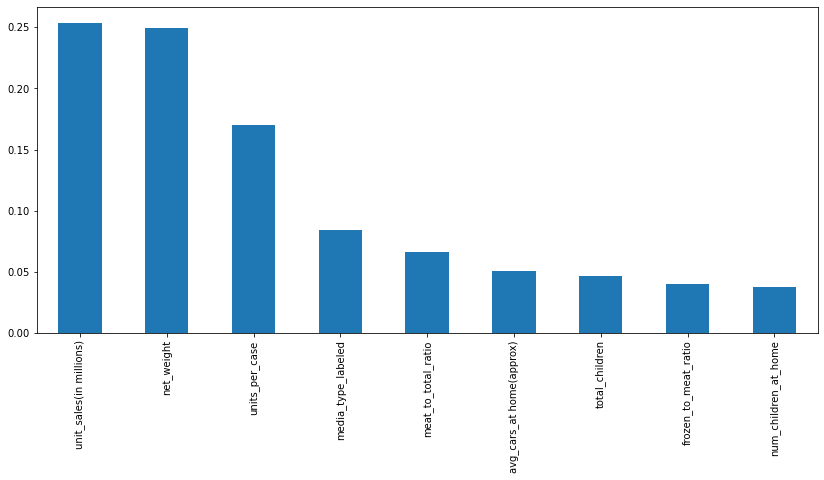

In [78]:
pd.Series(model_rf.feature_importances_,index = X.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6))

Setting a threshold of approximately 5 percent for relative feature importances, we will not include frozen_to_meat_ratio as a predictor in our models.

We will now experiment with all the remaining attributes.

In [25]:
X_new = df.drop(['frozen_to_meat_ratio'], axis = 1)

In [26]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 0)

In [27]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state = 0, max_features = 10, n_estimators = 1000)
model_rf_new = randomforest.fit(X_train_new, y_train)
y_test_pred_new = model_rf_new.predict(X_test_new)

In [28]:
model_rf_new.feature_importances_

array([0.02448912, 0.04219158, 0.03491439, 0.02567854, 0.06993244,
       0.06877169, 0.05954323, 0.0554463 , 0.03285098, 0.01297446,
       0.01177668, 0.00819187, 0.00772582, 0.00540881, 0.00551133,
       0.00659327, 0.25864574, 0.00978413, 0.0083107 , 0.00700185,
       0.00521318, 0.01292645, 0.0157621 , 0.00524986, 0.01066574,
       0.00703044, 0.00997289, 0.00808442, 0.00874649, 0.008034  ,
       0.00853476, 0.01031682, 0.0097085 , 0.01032932, 0.01548842,
       0.00494233, 0.00508242, 0.00328691, 0.00990897, 0.00936781,
       0.00763849, 0.00470091, 0.00376851, 0.00310051, 0.0016931 ,
       0.00522392, 0.00553312, 0.00210863, 0.00190067, 0.00041761,
       0.01102914, 0.00157258, 0.00613602, 0.00421885, 0.00656317])

In [29]:
X_new.columns.to_numpy()

array(['unit_sales(in millions)', 'total_children',
       'avg_cars_at home(approx)', 'num_children_at_home', 'SRP',
       'net_weight', 'units_per_case', 'sales_to_cost_ratio',
       'meat_to_total_ratio', 'recyclable_package', 'low_fat',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'media_type_labeled', 'food_family_Food',
       'food_family_Non-Consumable', 'sales_country_Mexico',
       'sales_country_USA', 'marital_status_S', 'gender_M',
       'education_Graduate Degree', 'education_High School Degree',
       'education_Partial College', 'education_Partial High School',
       'member_card_Golden', 'member_card_Normal', 'member_card_Silver',
       'occupation_Management', 'occupation_Manual',
       'occupation_Professional', 'occupation_Skilled Manual',
       'houseowner_Y', 'avg. yearly_income_$110K - $130K',
       'avg. yearly_income_$130K - $150K', 'avg. yearly_income_$150K +',
       'avg. yearly_income_$30K - $50K', 'avg. yearl

In [30]:
feature_significances = pd.DataFrame(data = model_rf_new.feature_importances_, index = X_new.columns.to_numpy(), columns = ['feature significance'])
feature_significances.sort_values('feature significance', ascending = False)

,feature significance
media_type_labeled,0.258646
SRP,0.069932
net_weight,0.068772
units_per_case,0.059543
sales_to_cost_ratio,0.055446
total_children,0.042192
avg_cars_at home(approx),0.034914
meat_to_total_ratio,0.032851
num_children_at_home,0.025679
unit_sales(in millions),0.024489


In [31]:
from sklearn.metrics import mean_squared_error
forest_all_mse = mean_squared_error(y_test, y_test_pred_new, squared=False)
forest_all_mse

18.213818022170365

Therefore, we will select variables with a feature importance of greater than or equal to 0.015 as our predictors.

In [32]:
X_final = df[['media_type_labeled', 'SRP', 'net_weight', 'units_per_case', 'sales_to_cost_ratio', 'total_children', 'avg_cars_at home(approx)', 'meat_to_total_ratio',
              'num_children_at_home', 'unit_sales(in millions)', 'gender_M', 'houseowner_Y']]

# Model Development

In [33]:
X_train_final, X_test_final, y_train, y_test = train_test_split(X_final, y, test_size = 0.3, random_state = 0)

In [34]:
X_test_final, X_val_final, y_test, y_val = train_test_split(X_test_final, y_test, test_size = 0.5, random_state = 0)

## Baseline Model

In [35]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
base_model = dr.fit(X_train_final, y_train)
y_test_pred_base = base_model.predict(X_test_final)

In [36]:
base_mse = mean_squared_error(y_test, y_test_pred_base, squared=False)
base_mse

28.78270510107593

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0, max_features = 10, max_depth = 5)
model_dt_final = dt.fit(X_train_final, y_train)
y_test_pred_final = model_dt_final.predict(X_test_final)

In [38]:
decisiontree_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
decisiontree_pred_mse

26.6621484277199

## Random Forest

In [39]:
randomforest = RandomForestRegressor(random_state = 0)
model_rf_final = randomforest.fit(X_train_final, y_train)
y_test_pred_final = model_rf_final.predict(X_test_final)

In [40]:
randomforest_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
randomforest_pred_mse

18.093379115761447

## Extra Tree

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
extratree = ExtraTreesRegressor(random_state = 0)
model_et_final = extratree.fit(X_train_final, y_train)
y_test_pred_final = model_et_final.predict(X_test_final)

In [42]:
extratree_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
extratree_pred_mse

15.502542539014698

## AdaBoost

In [43]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state = 0, n_estimators = 1000)
model_ab_final = adaboost.fit(X_train_final, y_train)
y_test_pred_final = model_ab_final.predict(X_test_final)

In [44]:
adaboost_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
adaboost_pred_mse

20.645442307874493

## Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 0)
model_gb_final = gb.fit(X_train_final, y_train)
y_test_pred_final = model_gb_final.predict(X_test_final)

In [46]:
gb_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
gb_pred_mse

24.65856043263424

# LightGBM

In [48]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install libomp.dylib

ERROR: Could not find a version that satisfies the requirement libomp.dylib
ERROR: No matching distribution found for libomp.dylib
Note: you may need to restart the kernel to use updated packages.


In [49]:
import lightgbm as ltb
lgbm = ltb.LGBMRegressor(random_state = 0)
model_lgbm_final = lgbm.fit(X_train_final,y_train)
y_test_pred = model_lgbm_final.predict(X_test_final)

OSError: dlopen(/Users/mikemurphy/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/mikemurphy/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [53]:
lgbm_mse = mean_squared_error(y_test, y_test_pred, squared=False)
lgbm_mse

19.54910989606652

# XGBoost

In [50]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(random_state = 0)
model_xgbr_final = xgbr.fit(X_train_final,y_train)
y_test_pred = model_xgbr_final.predict(X_test_final)

In [51]:
xgbr_mse = mean_squared_error(y_test, y_test_pred, squared=False)
xgbr_mse

19.54910989606652

## Artificial Neural Network

In [54]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(hidden_layer_sizes = (20), max_iter = 2000, random_state = 0)
model_ann_final = ann.fit(X_train_final, y_train)
y_test_pred_final = model_ann_final.predict(X_test_final)

In [55]:
ann_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
ann_pred_mse

28.333788661188553

# Model Selection and Cross Validation

According to the results, the Extra Tree model performs the best since it has the lowest MSE. Therefore, we will chose it as our final model and do cross-validation.



In [56]:
final_model = model_et_final

In [57]:
# According to the size of our dataset, we will divide it to 10 folds for cross-validation
from sklearn.model_selection import cross_val_score
final_model.fit(X_train_final, y_train)
et_mses = -cross_val_score(final_model, X_test_final, y_test, scoring="neg_root_mean_squared_error", cv=10)

In [58]:
pd.Series(et_mses).describe()

count    10.000000
mean     19.700841
std       0.626449
min      18.866365
25%      19.336238
50%      19.556748
75%      20.066659
max      20.831160
dtype: float64

In [59]:
final_model.fit(X_train_final, y_train)
final_predictions = final_model.predict(X_test_final)
final_mse = mean_squared_error(y_test, final_predictions, squared=False)
final_mse

15.502542539014698

In [60]:
import pickle 

with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

# Hyperparameter Optimization

Having the extra tree model chosen as our final model, we are trying to find optimal hyperparameters for this model. We will modify the number of trees (n_estimators), criterion, the maximum depth of the tree (max_depth), and whether to reuse the solution of the previous call to fit and add more estimators to the ensemble (warm_start). Also, we will consider Grid Search, Randomized Search, and Bayesian Optimization and compare the results.


Randomized Search


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_space = {
    'n_estimators': sp_randint(200, 1000),
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': range(6, 16),
    'warm_start': [False, True]
}

In [ ]:
rs = RandomizedSearchCV(
    estimator=final_model,
    param_distributions=param_space,
    n_iter=100,
    cv=10,
    random_state=0,
    n_jobs=-1
)

In [ ]:
rs.fit(X_train_final, y_train)

In [ ]:
print(rs.best_params_)

## Extra trees train, val, test

In [82]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# Train an Extra Trees Regressor model on the training set
extratree = ExtraTreesRegressor(random_state=0)
model_et_final = extratree.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model_et_final.predict(X_val)

# Compute the validation score
extratree_val_mse = mean_squared_error(y_val, y_val_pred, squared=False)

# Make predictions on the testing set
y_test_pred_final = model_et_final.predict(X_test)

# Compute the testing score
extratree_test_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)

# Print the validation and testing scores
print(f'Validation RMSE: {extratree_val_mse:.4f}')
print(f'Testing RMSE: {extratree_test_mse:.4f}')

Validation RMSE: 28.7217
Testing RMSE: 28.7335


## Optuna Hyperparameter Tunning

In [81]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import optuna



In [92]:
def objective(trial):
    # Define the range of hyperparameters to be tuned
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt']),
        'random_state': 0
    }
    
    # Train the ExtraTreesRegressor model with the given hyperparameters on the training set
    extratree = ExtraTreesRegressor(**params)
    extratree.fit(X_train, y_train)
    
    # Make predictions on the validation set and calculate the mean squared error
    y_val_pred = extratree.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred, squared=False)
    
    return mse

# Load the data and split it into training, validation, and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# Run the Optuna study to search for the best hyperparameters
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=50)

# Train a new ExtraTreesRegressor model with the best hyperparameters found by Optuna on the full training set
best_params = study.best_params
extratree = ExtraTreesRegressor(**best_params, random_state=0)
extratree.fit(X_train, y_train)

# Make predictions on the testing set and calculate the mean squared error
y_test_pred_final = extratree.predict(X_test)
extratree_test_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)

# Print the testing score
print(f'Testing RMSE: {extratree_test_mse:.4f}')

print(f'Best Parameters: {study.best_params}')



[I 2023-04-20 20:20:53,042] A new study created in memory with name: no-name-b6321b1a-e3d9-4ab2-8b3c-4a1ca5bfdf4a
[I 2023-04-20 20:20:54,048] Trial 0 finished with value: 28.180049268855274 and parameters: {'n_estimators': 279, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 28.180049268855274.
[I 2023-04-20 20:20:58,203] Trial 1 finished with value: 27.752413127666728 and parameters: {'n_estimators': 407, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 1 with value: 27.752413127666728.
[I 2023-04-20 20:20:59,692] Trial 2 finished with value: 27.976466420089572 and parameters: {'n_estimators': 298, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 1 with value: 27.752413127666728.
[I 2023-04-20 20:21:00,396] Trial 3 finished with value: 28.03471364384334 and parameters: {'n_estimators': 165, 'max_depth': 6, 'min_sa

[I 2023-04-20 20:23:21,990] Trial 31 finished with value: 27.5138579638985 and parameters: {'n_estimators': 417, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 22 with value: 27.510491658851837.
[I 2023-04-20 20:23:28,579] Trial 32 finished with value: 27.559801168008452 and parameters: {'n_estimators': 461, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 22 with value: 27.510491658851837.
[I 2023-04-20 20:23:35,122] Trial 33 finished with value: 27.51146049236694 and parameters: {'n_estimators': 409, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 22 with value: 27.510491658851837.
[I 2023-04-20 20:23:39,741] Trial 34 finished with value: 27.680279096486093 and parameters: {'n_estimators': 402, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 22 with value: 27.5104916588

Testing RMSE: 27.6915
Best Parameters: {'n_estimators': 436, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto'}


In [93]:
best_rmse = study.best_value
print(f'Best RMSE: {best_rmse:.4f}')
print(f'Best Parameters: {study.best_params}')

Best RMSE: 27.5076
Best Parameters: {'n_estimators': 436, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto'}
